# CS5002 Project 1 Part 2

Xiaoyuan Lu  
NUID: 002034691

## Section 1: Cost Function to Evaluate the Performance of a Predictive Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1

In [2]:
# load the dataset
data1 = np.loadtxt('data_chol_dias_pressure.txt')  # shape: (n, 2)

# Split into x and y
x1 = data1[:, 0]
y1 = data1[:, 1]

### 1.2

In [3]:
def cost_function(a, b, x, y):
    """
    Compute the cost function g(a, b) = sum((a * x_i + b - y_i)^2)

    Parameters:
    a : Slope of the line
    b : Intercept of the line
    x : Array of input (cholesterol levels)
    y : Array of target values (diastolic blood pressure)

    Returns: The total squared error across all data points.
    """
    predictions = a * x + b
    errors = predictions - y
    return np.sum(errors ** 2)

### 1.3

In [4]:
def wrap_cost_function(x, y):
    """
    Return a new function g(a, b) that only depends on a and b
    using fixed x and y from dataset
    """
    def g(a, b):
        return cost_function(a, b, x, y)
    return g

In [5]:
def approx_partial_deriv(f, a, b, var='a', h=1e-6):
    if var == 'a':
        return (f(a + h, b) - f(a, b)) / h
    elif var == 'b':
        return (f(a, b + h) - f(a, b)) / h

In [6]:
def gradient_descent_2d(f, a0=0, b0=0, alpha=0.01, epsilon=1e-6):
    """
    Perform gradient descent to find the optimization of a two-variable function
    """
    a, b = a0, b0
    iter = 0
    iter_max = 1000

    while iter < iter_max:
        da = approx_partial_deriv(f, a, b, var='a')
        db = approx_partial_deriv(f, a, b, var='b')

        a_new = a - alpha * da
        b_new = b - alpha * db

        if abs(a_new - a) < epsilon and abs(b_new -b) < epsilon:
            break

        a, b = a_new, b_new
        iter += 1

    return a, b

In [7]:
# Run gradient descent without normalization
a_raw, b_raw = gradient_descent_2d(wrap_cost_function(x1, y1))

### 1.4

In [8]:
def plot_fit_line(x, y, a, b, title):
    """
    Plot the original data points and the best-fit line y = ax + b.

    Parameters:
    a : Slope of the line
    b : Intercept of the line
    x : Array of input (cholesterol levels)
    y : Array of target values (diastolic blood pressure)
    title : The title of the plot

    """
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, a * x + b, color='red', label=f'Line: y = {a:.2f}x + {b:.2f}')
    plt.xlabel("Cholesterol Level")
    plt.ylabel("Diastolic Blood Pressure")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

The line plotted did not fit the data well. Although the data has a generally linear pattern, the gradient descent algorithm failed to find a good solution when applied directly to the original data.

### 1.5

In [9]:
def normalize(arr):
    """
    Function to normalize an array
    """
    return (arr - np.mean(arr)) / np.std(arr)

In [10]:
def unscale_line(a_std, b_std, x_mean, x_std, y_mean, y_std):
    """
    Convert the normalized line y' = a_std * x' + b_std back to original y = a * x + b
    """
    a = a_std * y_std / x_std
    b = y_std * b_std + y_mean - a * x_mean
    return a, b

In [11]:
# Compute the mean and std of the original x and y arrays
x1_mean, x1_std = np.mean(x1), np.std(x1)
y1_mean, y1_std = np.mean(y1), np.std(y1)

# Normalize the input and output data
x1_norm = normalize(x1)
y1_norm = normalize(y1)

# Run gradient descent on the normalized data to get optimal a* and b*
a_std, b_std = gradient_descent_2d(wrap_cost_function(x1_norm, y1_norm))

# Convert the solution (a*, b*) back to the original coordinate space
a1, b1 = unscale_line(a_std, b_std, x1_mean, x1_std, y1_mean, y1_std)

It was difficult to make gradient descent work properly with the original data because the x values (cholesterol levels) were much larger than y. As a result, the gradient of the cost function became highly unbalanced, especially in the direction of a (the slope). 

After scaling the data, both x and y were within similar ranges, and gradient descent became stable and converged easily.

## Section 2: Non-linear Data

### 2.1

In [12]:
data2 = np.loadtxt("data_chol_dias_pressure_non_lin.txt")
x2 = data2[:, 0]
y2 = data2[:, 1]

### 2.2

In [13]:
# Compute the mean and std of the original x and y arrays
x2_mean, x2_std = np.mean(x2), np.std(x2)
y2_mean, y2_std = np.mean(y2), np.std(y2)

# Normalize the input and output data
x2_norm = normalize(x1)
y2_norm = normalize(y1)

# Run gradient descent on the normalized data to get optimal a* and b*
g2 = wrap_cost_function(x2_norm, y2_norm)
a2_std, b2_std = gradient_descent_2d(g2)

# Convert the solution (a*, b*) back to the original coordinate space
a2, b2 = unscale_line(a2_std, b2_std, x2_mean, x2_std, y2_mean, y2_std)

### 2.3

The plotted line does not perform well on the new data. This is because the updated data points clearly follow a nonlinear pattern. In particular, the data points begin to curve upwards more strongly as the cholesterol level increases, which a straight line cannot capture.
A straight line is simply not flexible enough to follow the curved pattern in the data. Therefore, even the optimal line performs poorly on this new dataset.

### 2.4

To improve performance on the nonlinear dataset, one possible modification is to change the model from a linear function to a polynomial function: a quadratic model such as $ f(x) = ax^2 + bx + c $ may better fit the upward curve in the data.

Using the same gradient descent method, we can now optimize three parameters instead of two, and the resulting fit may better match the actual shape of the data. This change makes the model more suitable for the current data set.

## Section 3: Report

This project implements gradient descent for a cost function that depends on two variables.

The approach is tested on two datasets:

A linear dataset where a simple line provides a good fit.

A nonlinear dataset where the same linear model fails to follow the curve in the data.

An important observation is that gradient descent does not work reliably on unnormalized data. In the linear case, running gradient descent directly on raw values leads to unexpected results and poor fitting. After applying standard score normalization, the algorithm works more smoothly and gives better results.

For the nonlinear data, normalization alone is not enough. The linear model does not match the data trend, indicating the need for a more complex model.

The project showed how model choice and proper scaling can directly impact the success of gradient descent.

## Main Function

In [14]:
def main():
    # Section 1 Part 4
    print(f"Optimal a* = {a_raw:.4f}")
    print(f"Optimal b* = {b_raw:.4f}")
    plot_fit_line(x1, y1, a_raw, b_raw, title="Fit Line on Linear Data")
    
    # Section 1 Part 5
    print(f"Optimal a* = {a1:.4f}")
    print(f"Optimal b* = {b1:.4f}")
    plot_fit_line(x1, y1, a1, b1, title="Fit Line on Linear Data")

    # Section 2 Part 4
    print(f"Optimal a* = {a2:.4f}")
    print(f"Optimal b* = {b2:.4f}")
    plot_fit_line(x2, y2, a2, b2, title="Fit Line on Non-linear Data")

Optimal a* = 2076063493492.5049
Optimal b* = 41942504407.0059


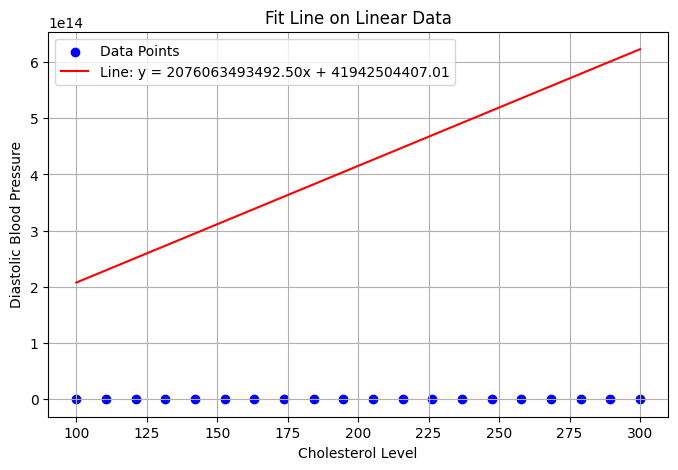

Optimal a* = 0.1998
Optimal b* = 40.0520


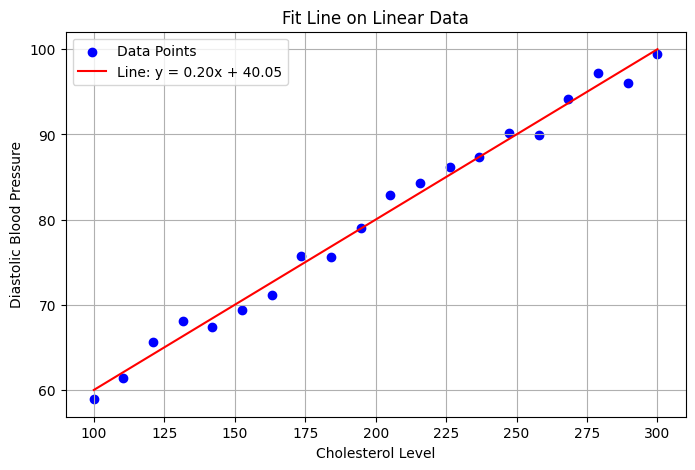

Optimal a* = 0.1477
Optimal b* = 43.8444


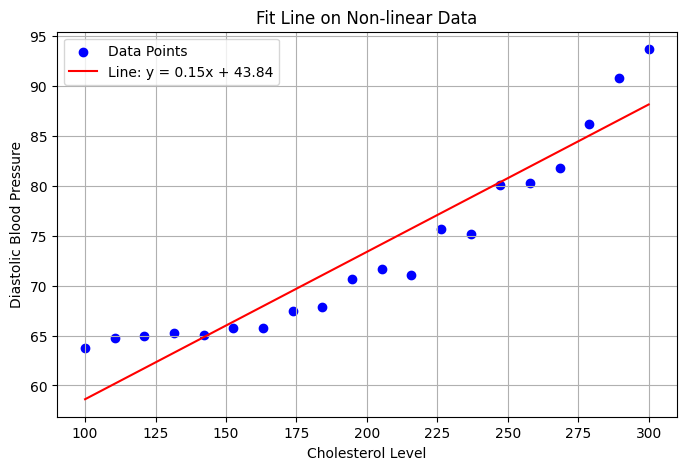

In [15]:
main()